In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [3]:
# Resultados del Estudio de Movilidad Ciclista 2018: Conteo ciclista.
# Fecha 22 de enero de 2019 Disponible en: https://datos.cdmx.gob.mx/explore/dataset/estudio-de-conteo-ciclista-2018/information/

# Save path to data set in a variable
data_file = "../Resources/estudio-de-conteo-ciclista-2018.json"

# Load JSON file
with open(data_file) as jsonfile:
    conteo_json = json.load(jsonfile)
    

In [17]:
# Show number of records
len(conteo_json)

3185

In [ ]:
[{"datasetid": "estudio-de-conteo-ciclista-2018",
 "recordid": "f2547a0dca61d33220191b3b0e4e3faac3a44cc0",
 
 "fields": 
      {"f1": 48, "p16_3": 2, "punto_lev": 11, "resul": 1, 
     "p22": 60, "p5": 5, "p2_col": "SAN BARTOLO", "p25": 4, "p24": 1, 
     "p27": 4, "p16_6": 1, "p16_1": 2, "p20": 1, "p23": 5000, 
     "p16_2": 1, "munori": "09010", "calle_lev": "CAMINO VIEJO A MIXCOAC", 
     "p16_8": 2, "p17_2": 3, "p17_3": 2, "folio": 6, "p4_col": "SAN BARTOLO",
     "p17_1": 2, "p26_8": 1, "p7_hr": 17, "mundes": "09010", "factor": 30.26, 
     "p26_1": 2, "p26_2": 2, "p26_3": 1, "p26_4": 2, "p26_5": 2, "p26_6": 2, 
     "p26_7": 2, "nivel": 3, "p21_nivel": 4, "p8_min": 55, "p24_1": 2, "p11": 2,
     "p13": 2, "p23_1": 3, "p15": 3, "p17": 1, "p18": 1, "p19": 1, "p11_1": 0.0, 
     "p7_min": 30, "p8_hr": 17, "p3": 1, "p1": 2, "p9_1": 0.0, "p16_4": 2, 
     "p21_ano": 3, "p6": 2, "p9": 2, "p16_7": 2, "id_unico": 103, 
     "calle_2": "2DA CERRADA TORRES TEPITO", "calle_1": "3RA CERRADA TORRES TEPITO",
     "p14_3": 1, "p14_2": 1, "p14_1": 2, "p16_5": 1, "p14_4": 2}, 
 
 "record_timestamp": "2019-01-22T13:46:38-06:00"},

In [43]:
# Convert the fields to a dataframe
temp_list = []
count = 0
for enc in conteo_json:
    #print(enc["fields"])
    encuesta = dict(enc["fields"])
    temp_list.append(encuesta)
    count = count + 1

encuesta_pd = pd.DataFrame(temp_list)

In [54]:
# Show the variables
encuesta_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 70 columns):
calle_1      3176 non-null object
calle_2      1682 non-null object
calle_lev    3184 non-null object
f1           3185 non-null int64
factor       3185 non-null float64
folio        3185 non-null int64
id_unico     3185 non-null int64
mundes       3185 non-null object
munori       3185 non-null object
nivel        3185 non-null int64
p1           3185 non-null int64
p10          961 non-null float64
p11          3185 non-null int64
p11_1        3185 non-null float64
p12          575 non-null float64
p13          3184 non-null float64
p14_1        3185 non-null int64
p14_2        3185 non-null int64
p14_3        3185 non-null int64
p14_4        3185 non-null int64
p15          3185 non-null int64
p16_1        3185 non-null int64
p16_2        3185 non-null int64
p16_3        3185 non-null int64
p16_4        3185 non-null int64
p16_5        3185 non-null int64
p16_6        3185 non-

In [153]:
# Create a dataframe with certain columns
df_var_enc = encuesta_pd.loc[:, ["f1", "p1", "p3", "p5", "p6", "p14_4", "p15", "p20", "nivel", "p24"]]
df_var_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 10 columns):
f1       3185 non-null int64
p1       3185 non-null int64
p3       3185 non-null int64
p5       3185 non-null int64
p6       3185 non-null int64
p14_4    3185 non-null int64
p15      3185 non-null int64
p20      3185 non-null int64
nivel    3185 non-null int64
p24      3185 non-null int64
dtypes: int64(10)
memory usage: 248.9 KB


In [154]:
# Show the results
df_var_enc.head()

,f1,p1,p3,p5,p6,p14_4,p15,p20,nivel,p24
0,48,2,1,5,2,2,3,1,3,1
1,19,1,2,5,1,3,1,1,4,1
2,35,1,3,2,9,4,10,1,5,1
3,16,2,2,3,8,4,3,1,3,6
4,43,2,2,4,1,4,10,1,1,1


In [155]:
# Define values for the questions 1. ¿De qué lugar viene usted? and 3. ¿A dónde se dirige?
p1_p3 = [{'id' : "1", 'name' : "Hogar"},
         {'id' : "2", 'name' : "Trabajo"},
         {'id' : "3", 'name' : "Escuela"}, 
         {'id' : "4", 'name' : "Centro comercial, tienda, mercado"},
         {'id' : "5", 'name' : "Otra vivienda"},
         {'id' : "6", 'name' : "Restaurante, bar, cafetería"}, 
         {'id' : "7", 'name' : "Otro"}, 
         {'id' : "98", 'name' : "No sabe"}, 
         {'id' : "99", 'name' : "No sabe"}]

# Map values for the question 1. ¿De qué lugar viene usted?  3. ¿A dónde se dirige?
df_var_enc['Origen'] = df_var_enc["p1"].map({int(i['id']):i["name"] for i in p1_p3})

# Map values for the question 3. ¿A dónde se dirige?
df_var_enc['Destino'] = df_var_enc["p3"].map({int(i['id']):i["name"] for i in p1_p3})

In [156]:
# Define values for the question 5 En el lugar a donde llegará ¿En dónde va a estacionar la bicicleta?
p5 = [{'id' : "1", 'name' : "Biciestacionamiento al aire libre"},
      {'id' : "2", 'name' : "Biciestacionamiento cubierto"},
      {'id' : "3", 'name' : "En un estacionamiento junto con autos"}, 
      {'id' : "4", 'name' : "En un poste, reja o mueble urbano"}, 
      {'id' : "5", 'name' : "La voy a guardar dentro del edificio al que voy por que no hay estacionamientos"},
      {'id' : "6", 'name' : "La dejaré en una estación por que es rentada (ecobici| mobike| vbike)"}, 
      {'id' : "8", 'name' : "No sabe"}, 
      {'id' : "9", 'name' : "No contestó"}]

# Map values for the question 5
df_var_enc['Lugar_Estac'] = df_var_enc["p5"].map({int(i['id']):i["name"] for i in p5})

In [157]:
# Define values for the question 6. ¿Cuál es el motivo de su viaje?
p6 = [{'id' : "1", 'name' : "Ir al trabajo"},
       {'id' : "2", 'name' : "Regreso a casa"}, 
       {'id' : "3", 'name' : "Ir a estudiar"}, 
       {'id' : "4", 'name' : "Hacer compras"}, 
       {'id' : "5", 'name' : "Llevar o recoger a alguien"},
       {'id' : "6", 'name' : "Rcreación"},
       {'id' : "7", 'name' : "Ir a comer"},
       {'id' : "8", 'name' : "Relacionado con el trabajo"}, 
       {'id' : "9", 'name' : "Trámite"},
       {'id' : "10", 'name' : "Ir de visita"},
       {'id' : "98", 'name' : "No sabe"},
       {'id' : "99", 'name' : "No contestó"}]

# Map values for the question 6
df_var_enc['Motivo'] = df_var_enc["p6"].map({int(i['id']):i["name"] for i in p6})

In [158]:
# Define values for the question 14. ¿Qué tanto ha influido los siguientes elementos para decidir 
# usar la bicicleta como medio de transporte? option 4 Que exista el sistema ECOBICI
p14_4 = [{'id' : "1", 'name' : "Mucho"},
         {'id' : "2", 'name' : "Algo"},
         {'id' : "3", 'name' : "Poco"},
         {'id' : "4", 'name' : "Nada"},
         {'id' : "8", 'name' : "No sabe"},
         {'id' : "9", 'name' : "No contestó"}]

# Map values for the question 14_4
df_var_enc['Influye_Ecobici'] = df_var_enc["p14_4"].map({int(i['id']):i["name"] for i in p14_4})

In [160]:
# Define values for the question 15. ¿Por qué motivo dejaría de usar la bicicleta para hacer este viaje?
p15 = [{'id' : "1", 'name' : "Por estar lesionado o incapacitado"},
        {'id' : "2", 'name' : "Por una falla mecanica de la bici"},
        {'id' : "3", 'name' : "Por cambiar de trabajo"},
        {'id' : "4", 'name' : "Por llevar prisa"},
        {'id' : "5", 'name' : "Por que el recorrido es muy largo"},
        {'id' : "6", 'name' : "Por falta de infraestructura"},
        {'id' : "7", 'name' : "Por el clima"},
        {'id' : "8", 'name' : "Inseguridad"},
        {'id' : "9", 'name' : "Que no haya una bici disponible"},
        {'id' : "10", 'name' : "Por ningún motivo la dejaría de usar"},
        {'id' : "11", 'name' : "No sabe"},
        {'id' : "12", 'name' : "No contestó"}]

# Map values for the question 15
df_var_enc['Motivo_NoUso'] = df_var_enc["p15"].map({int(i['id']):i["name"] for i in p15})

In [170]:
# Define values for the question 20. Sexo
p20 = [{'id' : "1", 'name' : "Hombre"}, {'id' : "2", 'name' : "Mujer"}, {'id' : "9", 'name' : "No contestó"}]

# Map values for the question 20
df_var_enc['Genero'] = df_var_enc["p20"].map({int(i['id']):i["name"] for i in p20})

In [163]:
# Define values for the question Categoría de nivel educativo
nivel = [{'id' : "1", 'name' : "Ninguno"},
         {'id' : "2", 'name' : "Primaria"},
         {'id' : "3", 'name' : "Secundaria"},
         {'id' : "4", 'name' : "Preparatoria o Bachillerato"},
         {'id' : "5", 'name' : "Licenciatura o Posgrado"},
         {'id' : "98", 'name' : "No sabe"}, 
         {'id' : "99", 'name' : "No contestó"}]

# Map values for the question 
df_var_enc['Nivel_Estudios'] = df_var_enc["nivel"].map({int(i['id']):i["name"] for i in nivel})

In [164]:
#p24 = {"1" : "Propia","2" : "ECOBICI","3" : "Mobike","4" : "Vbike","5" : "Dezba","6" : "Otro","9" : "No sabe"}
# Define values for the question 24. Tipo de bicicleta
p24 = [{'id' : "1", 'name' : "Propia"},
        {'id' : "2", 'name' : "ECOBICI"},
        {'id' : "3", 'name' : "Mobike"},
        {'id' : "4", 'name' : "Vbike"},
        {'id' : "5", 'name' : "Dezba"},
        {'id' : "6" , 'name' : "Otro"},
        {'id' : "9" , 'name' : "No sabe"}]

# Map values for the question 24
df_var_enc['Tipo_Bici'] = df_var_enc["p24"].map({int(i['id']):i["name"] for i in p24})

In [165]:
# Change the name of the column that has the age of the person
df_var_enc = df_var_enc.rename(columns={"f1": "Edad"})

In [166]:
# Show the results
df_var_enc

,Edad,p1,p3,p5,p6,p14_4,p15,p20,nivel,p24,Origen,Destino,Lugar_Estac,Motivo,Influye_Ecobici,Motivo_NoUso,Genero,Nivel_Estudios,Tipo_Bici
0,48,2,1,5,2,2,3,1,3,1,Trabajo,Hogar,La voy a guardar dentro del edificio al que vo...,Regreso a casa,Algo,Por cambiar de trabajo,Hombre,Secundaria,Propia
1,19,1,2,5,1,3,1,1,4,1,Hogar,Trabajo,La voy a guardar dentro del edificio al que vo...,Ir al trabajo,Poco,Por estar lesionado o incapacitado,Hombre,Preparatoria o Bachillerato,Propia
2,35,1,3,2,9,4,10,1,5,1,Hogar,Escuela,Biciestacionamiento cubierto,Trámite,Nada,Por ningún motivo la dejaría de usar,Hombre,Licenciatura o Posgrado,Propia
3,16,2,2,3,8,4,3,1,3,6,Trabajo,Trabajo,En un estacionamiento junto con autos,Relacionado con el trabajo,Nada,Por cambiar de trabajo,Hombre,Secundaria,Otro
4,43,2,2,4,1,4,10,1,1,1,Trabajo,Trabajo,"En un poste, reja o mueble urbano",Ir al trabajo,Nada,Por ningún motivo la dejaría de usar,Hombre,Ninguno,Propia
5,46,2,1,5,2,4,10,1,3,1,Trabajo,Hogar,La voy a guardar dentro del edificio al que vo...,Regreso a casa,Nada,Por ningún motivo la dejaría de usar,Hombre,Secundaria,Propia
6,18,1,2,4,1,3,4,1,2,1,Hogar,Trabajo,"En un poste, reja o mueble urbano",Ir al trabajo,Poco,Por llevar prisa,Hombre,Primaria,Propia
7,54,1,7,4,9,4,3,1,3,1,Hogar,Otro,"En un poste, reja o mueble urbano",Trámite,Nada,Por cambiar de trabajo,Hombre,Secundaria,Propia
8,19,1,2,1,1,4,8,1,3,1,Hogar,Trabajo,Biciestacionamiento al aire libre,Ir al trabajo,Nada,Inseguridad,Hombre,Secundaria,Propia
9,50,1,2,1,1,4,2,2,2,1,Hogar,Trabajo,Biciestacionamiento al aire libre,Ir al trabajo,Nada,Por una falla mecanica de la bici,Mujer,Primaria,Propia


In [167]:
df_var_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 19 columns):
Edad               3185 non-null int64
p1                 3185 non-null int64
p3                 3185 non-null int64
p5                 3185 non-null int64
p6                 3185 non-null int64
p14_4              3185 non-null int64
p15                3185 non-null int64
p20                3185 non-null int64
nivel              3185 non-null int64
p24                3185 non-null int64
Origen             3185 non-null object
Destino            3185 non-null object
Lugar_Estac        3179 non-null object
Motivo             3185 non-null object
Influye_Ecobici    3185 non-null object
Motivo_NoUso       3185 non-null object
Genero             3184 non-null object
Nivel_Estudios     3185 non-null object
Tipo_Bici          3185 non-null object
dtypes: int64(10), object(9)
memory usage: 472.9+ KB


In [296]:
# Create a dataframe with the number of "unidades económicas" by municipio and sector
df_gen = pd.DataFrame(df_var_enc["Genero"].value_counts())

# Reset index
df_gen.reset_index(inplace=True)

df_gen

,index,Genero
0,Hombre,2656
1,Mujer,528
2,No contestó,1


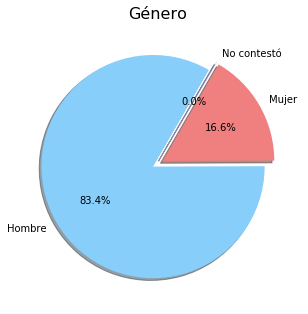

In [301]:
colors = ["lightskyblue", "lightcoral", "slateblue"]
explode = (0.05, 0.05, 0.05)

fig, a = plt.subplots(figsize=(5, 10), subplot_kw=dict(aspect="equal"))

plt.pie( df_gen['Genero'], explode=explode, labels=df_gen['index'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)

plt.title("Género", fontsize=16)

plt.show()


In [333]:
df_tray = pd.DataFrame(df_var_enc.groupby(['Origen', 'Destino']).p1.count())
df_tray.reset_index(inplace=True)
df_tray = df_tray.rename(columns={"p1": "Cuenta"})

In [334]:
df_tray.sort_values(by=['Cuenta'], ascending=False)

,Origen,Destino,Cuenta
18,Hogar,Trabajo,761
39,Trabajo,Hogar,573
11,Hogar,"Centro comercial, tienda, mercado",298
16,Hogar,Otro,231
44,Trabajo,Trabajo,181
8,Escuela,Hogar,149
15,Hogar,Otra vivienda,146
12,Hogar,Escuela,145
2,"Centro comercial, tienda, mercado",Hogar,135
29,Otro,Hogar,99


In [343]:
# Create a dataframe with the number of "unidades económicas" by municipio and sector
df_age = pd.DataFrame(df_var_enc["Edad"].value_counts())

# Reset index
df_age.reset_index(inplace=True)

df_age = df_age.rename(columns={"index": "Age", "Edad": "Count"})
df_age.min()

Age      12
Count     1
dtype: int64

In [350]:
# Create the bins in which Data will be held
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create the names for the four bins
group_names = ["12-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]

# Create column "Test Score Summary" with the bins
df_age["Groups"] = pd.cut(df_age["Age"], bins, labels=group_names)

# Creating a group based off of the bins
df = df_age.groupby("Groups").Count.sum()
df



Groups
12-20     453
21-30     850
31-40     693
41-50     538
51-60     383
61-70     191
71-80      62
81-90       7
91-100      8
Name: Count, dtype: int64

In [ ]:
# Create a dataframe 
df_ori = pd.DataFrame(df_var_enc["Origen"].value_counts())
# Reset index
df_ori.reset_index(inplace=True)
df_ori

In [181]:
# Create a dataframe 
df_des = pd.DataFrame(df_var_enc["Destino"].value_counts())
# Reset index
df_des.reset_index(inplace=True)
df_des

,index,Destino
0,Hogar,1029
1,Trabajo,1016
2,"Centro comercial, tienda, mercado",404
3,Otro,336
4,Otra vivienda,194
5,Escuela,172
6,"Restaurante, bar, cafetería",28
7,No sabe,6


In [195]:
df_lug = pd.merge(df_ori, df_des, on="index", how="outer")
df_lug = df_lug.fillna(0)
df_lug["Origen"] = df_lug["Origen"].astype(int)
df_lug["Origen"]

0    1604
1     984
2     179
3     161
4     157
5      84
6      16
7       0
Name: Origen, dtype: int32

In [197]:
df_lug["Destino"]

0    1029
1    1016
2     404
3     172
4     336
5     194
6      28
7       6
Name: Destino, dtype: int64

In [196]:
df_lug["index"]

0                                Hogar
1                              Trabajo
2    Centro comercial, tienda, mercado
3                              Escuela
4                                 Otro
5                        Otra vivienda
6          Restaurante, bar, cafetería
7                              No sabe
Name: index, dtype: object

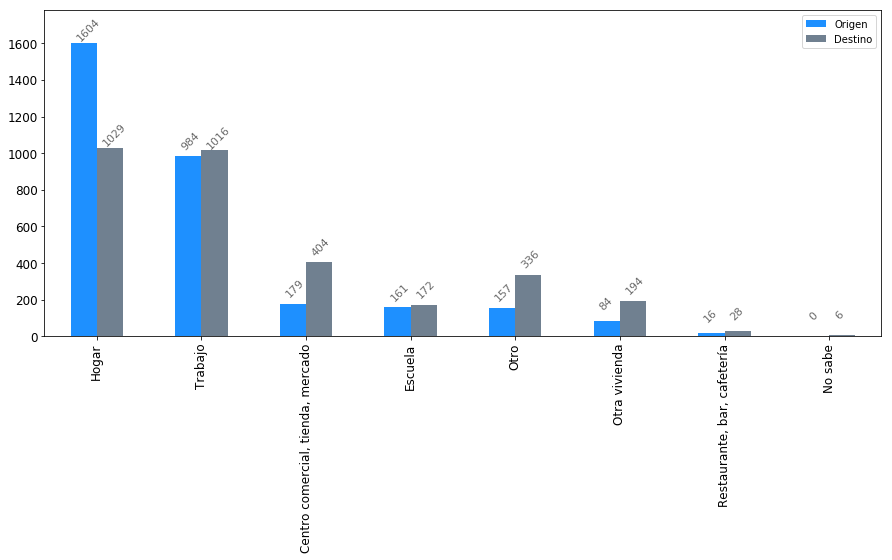

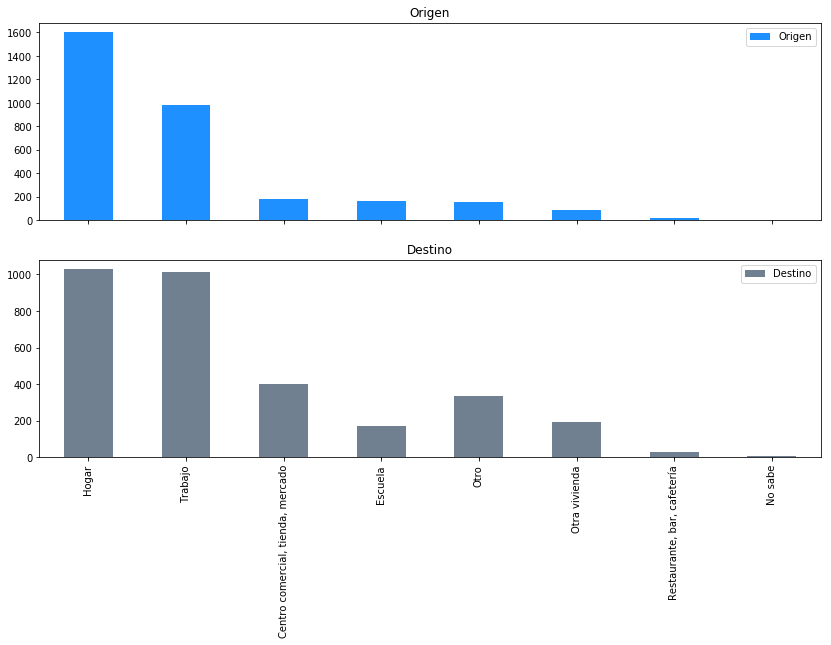

In [238]:
df = pd.DataFrame({'Origen': df_lug["Origen"].tolist(),
                   'Destino': df_lug["Destino"].tolist()}, index=df_lug["index"].tolist())

ax = df.plot(kind='bar', rot="vertical", figsize=(15,6), color=['dodgerblue', 'slategray'], fontsize=12, align="center")
ax.set_ylim(0,1780)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)
    
    
axes = df.plot.bar(rot="vertical", subplots=True, figsize=(14, 8), color=['dodgerblue', 'slategray'], legend=True)
axes[1].legend(loc="best") 


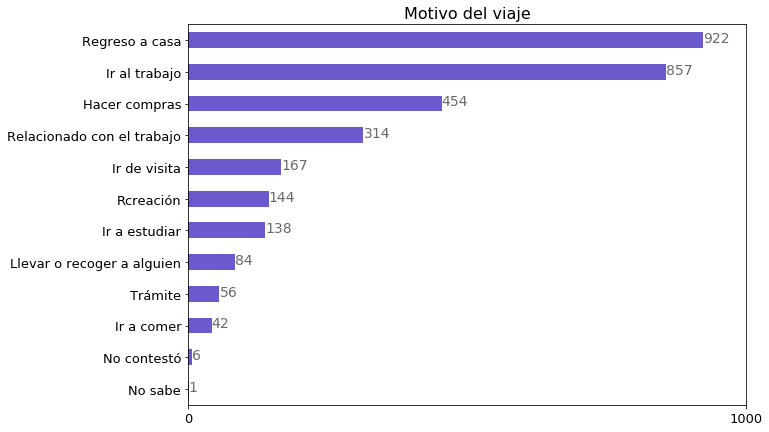

In [228]:
ax = df_var_enc['Motivo'].value_counts().plot(kind='barh', figsize=(10,7), color="slateblue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Motivo del viaje", fontsize=16)
ax.set_xticks([0, 1000])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [240]:
df_est = pd.DataFrame(df_var_enc["Nivel_Estudios"].value_counts())
# Reset index
df_est.reset_index(inplace=True)
df_est

,index,Nivel_Estudios
0,Secundaria,1100
1,Preparatoria o Bachillerato,1074
2,Primaria,454
3,Licenciatura o Posgrado,380
4,Ninguno,171
5,No contestó,4
6,No sabe,2


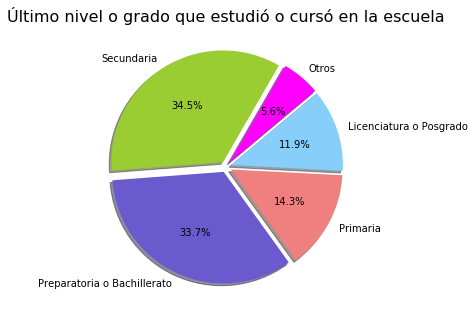

In [286]:
levels = df_est['index'].tolist()
levels.insert(4, "Otros")

values = df_est['Nivel_Estudios'].tolist()
values.insert(4, 177)

colors = ["yellowgreen", "slateblue", "lightcoral", "lightskyblue", "magenta", "green", "red"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#Evitar usar el porcentaje, e imprimir el valor real
fig, a = plt.subplots(figsize=(5, 10), subplot_kw=dict(aspect="equal"))

plt.pie(values[0:-3], explode=explode[0:-3], labels=levels[0:-3], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)

plt.title("Último nivel o grado que estudió o cursó en la escuela", fontsize=16)

plt.show()

In [288]:
df_var_enc['Influye_Ecobici'].value_counts()

Nada           1371
Mucho           743
Poco            474
Algo            414
No sabe         126
No contestó      57
Name: Influye_Ecobici, dtype: int64

In [287]:
df_var_enc['Lugar_Estac'].value_counts()

La voy a guardar dentro del edificio al que voy por que no hay estacionamientos    1319
En un poste, reja o mueble urbano                                                   922
Biciestacionamiento al aire libre                                                   399
En un estacionamiento junto con autos                                               266
Biciestacionamiento cubierto                                                        183
No sabe                                                                              47
No contestó                                                                          24
La dejaré en una estación por que es rentada (ecobici| mobike| vbike)                19
Name: Lugar_Estac, dtype: int64

In [289]:
df_var_enc['Tipo_Bici'].value_counts()

Propia     2968
Otro         91
ECOBICI      65
Mobike       39
Vbike        20
No sabe       1
Dezba         1
Name: Tipo_Bici, dtype: int64

In [290]:
df_var_enc['Motivo_NoUso'].value_counts()

Por estar lesionado o incapacitado      1044
Por una falla mecanica de la bici        503
Por ningún motivo la dejaría de usar     443
Por el clima                             311
Inseguridad                              220
Por cambiar de trabajo                   204
Por que el recorrido es muy largo        165
Por llevar prisa                         139
Por falta de infraestructura              64
Que no haya una bici disponible           59
No sabe                                   28
No contestó                                5
Name: Motivo_NoUso, dtype: int64

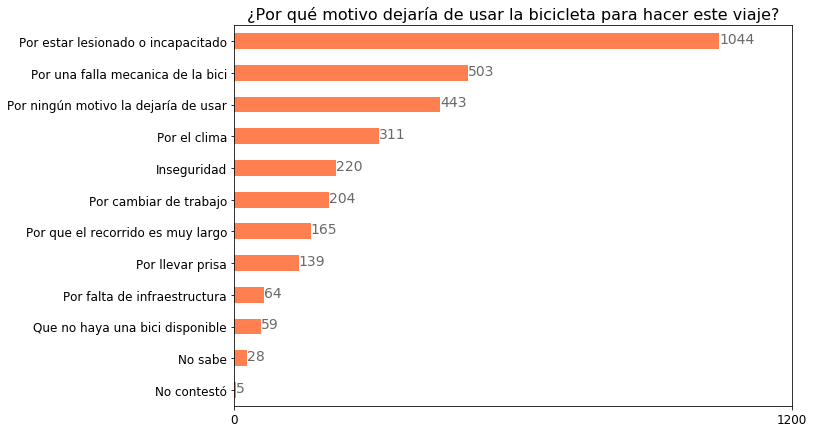

In [295]:
ax = df_var_enc['Motivo_NoUso'].value_counts().plot(kind='barh', figsize=(10,7), color="coral", fontsize=12);
ax.set_alpha(0.8)
ax.set_title("¿Por qué motivo dejaría de usar la bicicleta para hacer este viaje?", fontsize=16)
ax.set_xticks([0, 1200])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()